In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


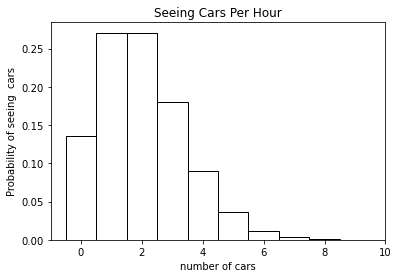

In [2]:
#visualize
x = range(0, 10)


y = stats.poisson(2).pmf(x)

plt.title("Seeing Cars Per Hour")
plt.xlabel("number of cars")
plt.ylabel("Probability of seeing  cars")
plt.bar(x, y, color="white", edgecolor="black", width=1)
plt.show()

- What is the probability that no cars drive up in the noon hour?

In [3]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [4]:

(np.random.poisson(2, 100000) == 0).mean()

0.13651

- What is the probability that 3 or more cars come through the drive through?

In [5]:
stats.poisson(2).sf(2)

0.32332358381693654

In [6]:
(np.random.poisson(2, 100000) >= 3).mean()

0.32305

- How likely is it that the drive through gets at least 1 car?

In [7]:
stats.poisson(2).sf(0)

0.8646647167633873

In [8]:
(np.random.poisson(2, 100000) >= 1).mean()

0.86325

### 2.  Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 
    - Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

- What grade point average is required to be in the top 5% of the graduating class

In [9]:
stats.norm(3, .3).isf(.05)

3.4934560880854417

In [10]:
np.quantile(np.random.normal(3, .3, 10000), .95)

3.498696545099679

- What GPA constitutes the bottom 15% of the class?

In [11]:
np.quantile(np.random.normal(3, .3, 10000), .15)

2.694694910343909

In [12]:

stats.norm(3, .3).ppf(.15)

2.689069983151863

In [13]:
# First Decile: 0-10 percentile
# Second Decile: 10-20 percentile
# Third Decile: 20-30 percentile

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 
    - Would a student with a 2.8 grade point average qualify for this scholarship?

In [14]:
stats.norm(3, .3).ppf([.2, .3,])

array([2.74751363, 2.84267985])

In [15]:
np.quantile(np.random.normal(3, .3, 10000), [.2, .3])

array([2.74804022, 2.8443127 ])

### 3.  A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

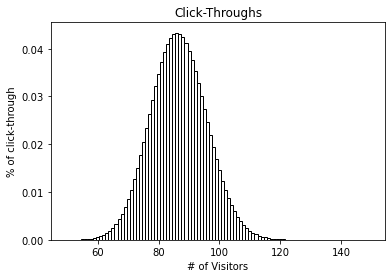

In [16]:
#visualizize 

x = np.arange(50, 150)
y = stats.binom(4326, .02).pmf(x)

plt.title("Click-Throughs")
plt.xlabel("# of Visitors")
plt.ylabel("% of click-through")
plt.bar(x, y, color="white", edgecolor="black", width=1)
plt.show()

In [17]:
p = .02
n = 4326

stats.binom(n, p).sf(96)

0.1397582363130086

In [18]:
(np.random.choice([1, 0], p=[.02, .98], size=(10000, 4326)).sum(axis=1) >= 97).mean()

0.1474

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?

In [19]:
p = .01
n = 60

stats.binom(n, p).sf(0)

0.4528433576092388

In [20]:
(np.random.uniform(size=(10000, 60)).round(2) == 0.34).any(axis=1).mean()

0.4595

In [21]:
(np.random.uniform(size=(10000, 60)).round(2) == np.random.uniform(size=(10000, 60)).round(2)).any(axis=1).mean()

0.4616

In [22]:
(np.random.binomial(60, .01, 100000) > 0).mean()

0.44935

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 
    - How likely is it that it goes two days without getting cleaned up? 
    - All week?

In [23]:
#initial 
p = .03
n = round(.9 * 3 * 22)

stats.binom(n, p).sf(0)

0.8342199288437355

In [24]:
(np.random.choice([1, 0], p=[.03, .97], size=(1000, n)).sum(axis=1) > 0).mean()

0.816

In [25]:
#two days 
1 - stats.binom(n * 2, p).sf(0)

0.02748303199257618

In [26]:
stats.binom(n * 2, p).cdf(0)

0.027483031992576134

In [27]:
stats.binom(n * 2, p).pmf(0)

0.02748303199257623

In [28]:
p_cleaned_one_day = stats.binom(n, p).sf(0)

stats.binom(2, p_cleaned_one_day).pmf(0)

0.02748303199257611

In [29]:

(np.random.choice([1, 0], p=[.03, .97], size=(1000, n * 2)).sum(axis=1) == 0).mean()

0.021

In [30]:
#two weeks

p = .03
n = round(.9 * 3 * 22)

1 - stats.binom(n * 5, p).sf(0)

0.00012521651388086585

In [31]:
(np.random.choice([1, 0], p=[.03, .97], size=(10000, n * 5)).sum(axis=1) == 0).mean()

0.0

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
- Assume you have one hour for lunch, and ignore travel time to and from La Panaderia. 

In [32]:
#mean = people * minutes to order
mean = 15 * 2
sd = 3 * 2

lunchtime = 60
time_to_get_food = 10 
eat_time = 15

max_wait_time = lunchtime - (time_to_get_food + eat_time)
stats.norm(mean, sd).cdf(max_wait_time)

0.7976716190363569

In [33]:
(np.random.normal(mean, sd, 10000) <= max_wait_time).mean()

0.8036

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

   
   


In [1]:
import env



url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE emp_no IN (
    SELECT emp_no FROM dept_emp
    WHERE to_date > NOW()
) AND to_date > NOW()
'''


In [8]:
salaries = pd.read_sql(query, url)

In [9]:
salaries.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


 a. What percent of employees earn less than 60,000?

In [10]:
mean = salaries.salary.mean()
sd = salaries.salary.std()

mean, sd

(72012.23585730705, 17309.99538025198)

In [11]:
stats.norm(mean,sd).cdf(60000)

0.24385742480214423

 b. What percent of employees earn more than 95,000?

In [13]:
stats.norm(mean, sd).sf(95000)

0.09208819199804053

  c. What percent of employees earn between 65,000 and 80,000?

In [14]:
np.diff(stats.norm(mean, sd).cdf([65000, 80000]))

array([0.33506057])

    d. What do the top 5% of employees make?

In [15]:
stats.norm(mean, sd).isf(.05)

100484.64454102777

<AxesSubplot:>

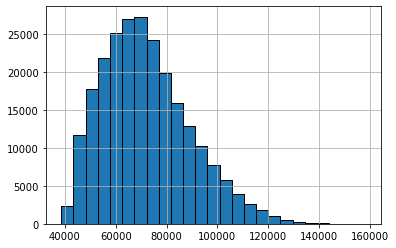

In [16]:
# Are the salaries really distributed normally?

salaries.salary.hist(bins = 25, ec = 'k')